In [26]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings("ignore")

In [27]:
df=pd.read_csv('merged_df.csv')

In [28]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,price_scaled
0,2019-10-11 08:00:10 UTC,view,3701005,2053013565983425517,appliances.environment.vacuum,philips,308.86,534764238,1a579f0b-5a1b-413c-bfe8-794d060af4e2,0.047685
1,2019-10-29 12:27:34 UTC,view,2701683,2053013563911439225,appliances.kitchen.refrigerators,beko,223.36,539740915,0f03975c-531e-4069-a56f-e6da871c62a2,0.034485
2,2019-10-12 13:58:05 UTC,view,4803977,2053013554658804075,electronics.audio.headphone,samsung,107.50,532272682,15eebe16-6df9-4009-9357-2f9473541c7b,0.016597
3,2019-10-05 02:58:45 UTC,view,1004739,2053013555631882655,electronics.smartphone,xiaomi,196.32,548100211,7687d322-801d-469b-a094-4cdb8f1bfcda,0.030310
4,2019-10-23 08:35:48 UTC,view,12600003,2053013554751078769,appliances.kitchen.grill,maxwell,71.82,519448060,b0b5dfcd-9631-491c-9c3e-4fb90f2ae88e,0.011088


In [29]:
#displaying statistics for numerical columns
df.describe()

,product_id,category_id,price,user_id,price_scaled
count,7.755380e+05,7.755380e+05,775538.000000,7.755380e+05,775538.000000
mean,3.665912e+06,2.111627e+18,233.445452,9.508108e+17,0.036042
std,6.288530e+06,4.382351e+16,344.099135,7.330133e+17,0.053125
min,8.540000e+02,2.053014e+18,0.000000,2.405221e+08,0.000000
25%,1.004249e+06,2.053014e+18,47.410000,5.458615e+08,0.007320
50%,1.695100e+06,2.144416e+18,128.680000,1.515916e+18,0.019867
75%,3.977213e+06,2.144416e+18,292.830000,1.515916e+18,0.045210
max,6.050001e+07,2.227847e+18,64771.060000,1.515916e+18,10.000000


In [30]:
#checking for skewness in the datafram
df.skew(numeric_only=True)

product_id       4.370858
category_id     -0.578958
price           30.313522
user_id         -0.526194
price_scaled    30.313522
dtype: float64

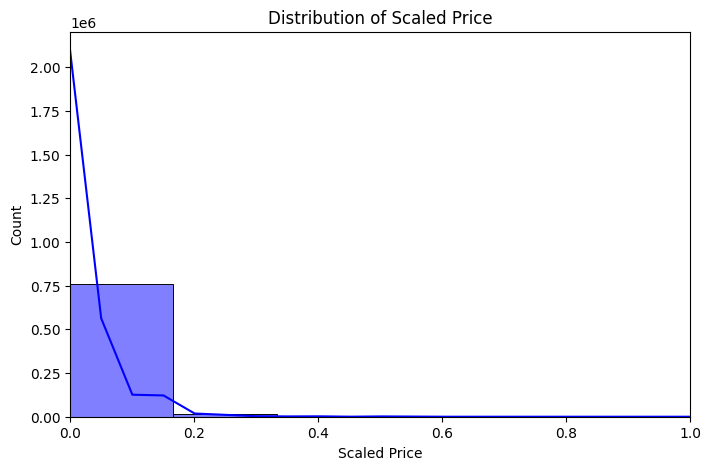

In [31]:
#checking for price distribution
plt.figure(figsize=(8,5))
ax=sns.histplot(df['price_scaled'], bins=60, kde=True,color='blue')
ax.set_xlim(0,1)
plt.title('Distribution of Scaled Price')
plt.xlabel('Scaled Price')
plt.ylabel('Count')
plt.show()

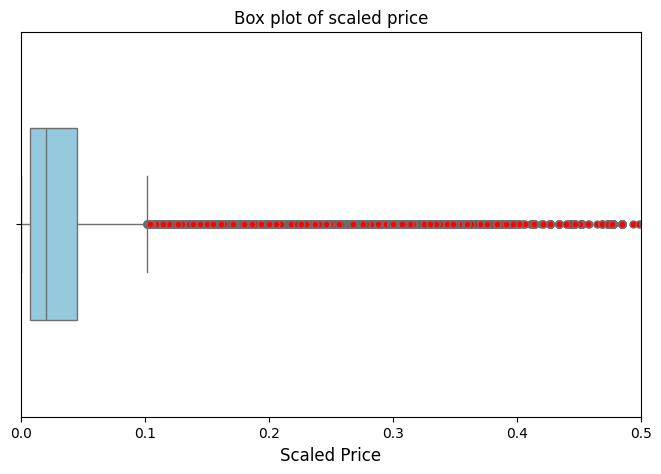

In [32]:
#plotting box plot to detect outliers in the column 'Price'
plt.figure(figsize=(8,5))
ax=sns.boxplot(x=df['price_scaled'],native_scale=True, color='skyblue', width=0.5, 
               flierprops={'marker':'o','markersize':5, 'markerfacecolor':'red'})
ax.set_xlim(0, 0.5)
plt.xlabel('Scaled Price', fontsize=12)
plt.title('Box plot of scaled price')
plt.show()

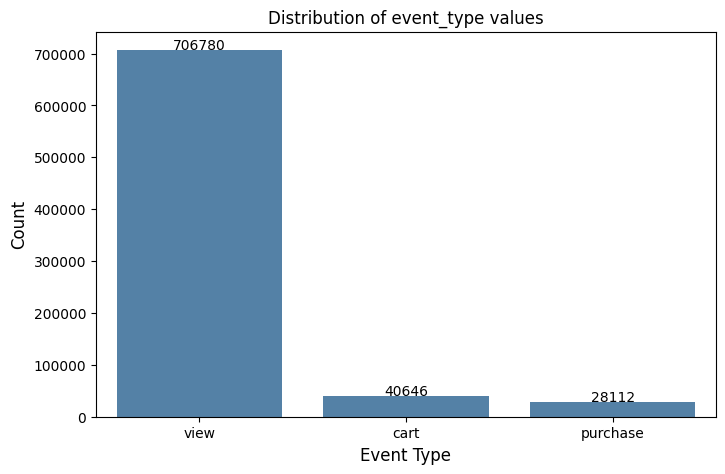

In [33]:
#Plotting the distribution of event_types
eventtype=df['event_type'].value_counts().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=eventtype, x=eventtype['event_type'], y=eventtype['count'],color='steelblue')
for index, value in enumerate(eventtype['count']):
    plt.text(index, value+1000, str(value), ha='center', fontsize=10)
plt.xlabel('Event Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of event_type values')
plt.show()

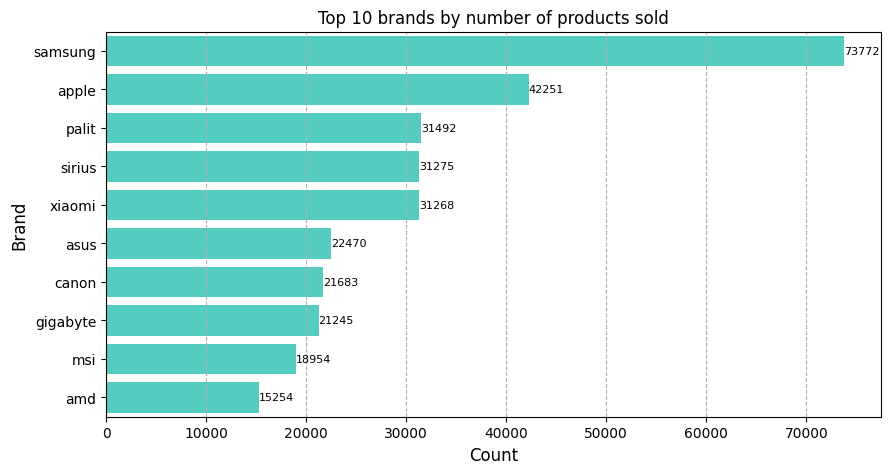

In [34]:
#finding the top 10 brands whose products are bought by users
brand=df['brand'].value_counts()[0:10].reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data=brand, x=brand['count'], y=brand['brand'],color='turquoise')

for index, value in enumerate(brand['count']):
    plt.text(value, index, str(value), va='center', fontsize=8)
plt.grid(axis='x', linestyle='--')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Brand', fontsize=12)
plt.title('Top 10 brands by number of products sold')
plt.show()

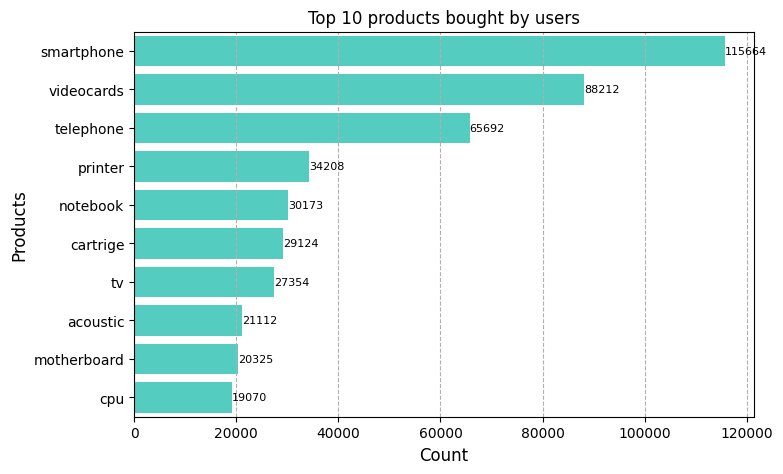

In [45]:
#finding the top 10 products bought by users
products=df['category_code'].value_counts()[:10].reset_index()
products['short_category_code']=products['category_code'].apply(lambda x: x.split('.')[-1] if isinstance(x,str) else x)
plt.figure(figsize=(8,5))
sns.barplot(data=products,x=products['count'],y=products['short_category_code'], color='turquoise')
for index, value in enumerate(products['count']):
    plt.text(value,index,str(value), va='center', fontsize=8)
plt.grid(axis='x', linestyle='--')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Products', fontsize=12)
plt.title('Top 10 products bought by users')
plt.show()